In [16]:
import glob
import os

import tensorflow as tf
from tensorflow.core.util import event_pb2
from matplotlib import pyplot as plt
import numpy as np

In [17]:
def get_section_results(file):
    """
    Extracts training environment steps and average return from TensorBoard summary files.

    Args:
        file (str): Path to the TensorBoard summary file.

    Returns:
        tuple: Two lists containing environment steps and average returns.
    """
    X = []
    Y = []
    std = []

    # Create a TFRecordDataset to read the event file
    dataset = tf.data.TFRecordDataset(file)

    for raw_record in dataset:
        event = event_pb2.Event.FromString(raw_record.numpy())
        for value in event.summary.value:
            if value.tag == "Train_EnvstepsSoFar" and value.HasField("simple_value"):
                X.append(value.simple_value)
            elif value.tag == "Eval_AverageReturn" and value.HasField("simple_value"):
                Y.append(value.simple_value)
            elif value.tag == "Eval_StdReturn" and value.HasField("simple_value"):
                std.append(value.simple_value)

        # Break if we have more than 120 entries in X
        if len(X) > 120:
            break

    return X, Y, std

In [18]:
event_files = {}


event_files["Ensemble Size"] = {}

event_files["Ensemble Size"]["1 Model"] = {}
event_files["Ensemble Size"]["1 Model"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_ensemble1*/events*")
)[0]

event_files["Ensemble Size"]["3 Models"] = {}
event_files["Ensemble Size"]["3 Models"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_ensemble3*/events*")
)[0]

event_files["Ensemble Size"]["5 Models"] = {}
event_files["Ensemble Size"]["5 Models"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_ensemble5*/events*")
)[0]


event_files["Number of Candidate Action Sequences"] = {}

event_files["Number of Candidate Action Sequences"]["100"] = {}
event_files["Number of Candidate Action Sequences"]["100"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_numseq100*/events*")
)[0]

event_files["Number of Candidate Action Sequences"]["1000"] = {}
event_files["Number of Candidate Action Sequences"]["1000"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_numseq1000*/events*")
)[0]


event_files["Planning Horizon"] = {}

event_files["Planning Horizon"]["5"] = {}
event_files["Planning Horizon"]["5"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_horizon5*/events*")
)[0]

event_files["Planning Horizon"]["15"] = {}
event_files["Planning Horizon"]["15"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_horizon15*/events*")
)[0]

event_files["Planning Horizon"]["30"] = {}
event_files["Planning Horizon"]["30"]["event_file"] = glob.glob(
    os.path.join(os.getcwd(), "data/*q4_reacher_horizon30*/events*")
)[0]

In [19]:
def convert_to_underscore_name(input_string):
    # Split the string into words
    words = input_string.split()
    # Convert each word to lowercase
    lowercase_words = [word.lower() for word in words]
    # Join the words with underscores
    underscore_name = "_".join(lowercase_words)
    return underscore_name

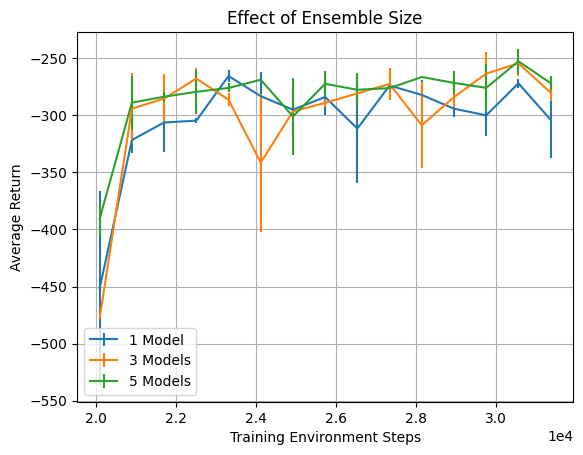

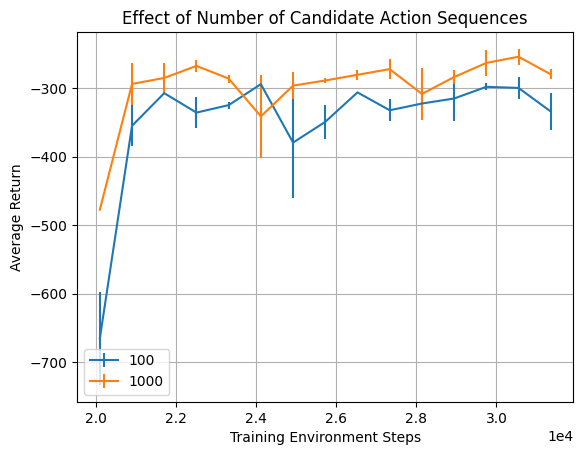

2024-11-16 18:25:21.128876: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


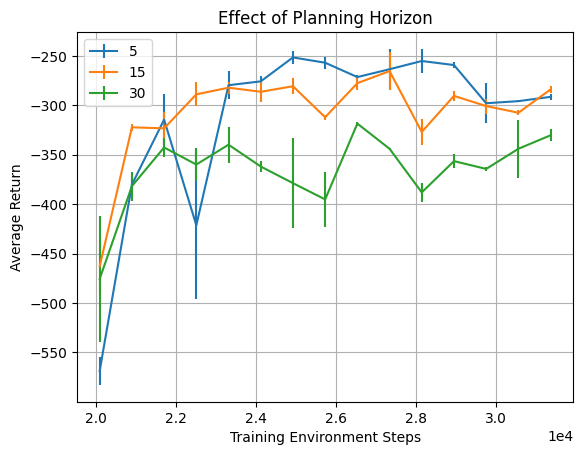

In [20]:
for experiment_name, experiment in event_files.items():
    for sub_experiment_name, sub_experiment in experiment.items():
        X, Y, std = get_section_results(sub_experiment["event_file"])
        plt.errorbar(X, Y, yerr=std, label=sub_experiment_name)

    plt.title("Effect of " + experiment_name)
    plt.xlabel("Training Environment Steps")
    plt.ylabel("Average Return")
    plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
    plt.legend()
    plt.grid()
    plt.savefig(
        "figs/P4_" + convert_to_underscore_name(experiment_name) + ".pdf",
        transparent=True,
    )
    plt.show()